In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# re-size all the images
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/dataKLTN/chest_xray/train'
valid_path = '/content/drive/MyDrive/dataKLTN/chest_xray/test'


In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 13s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/dataKLTN/chest_xray/train/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)


########################################################Generating the batches of augmentated data#############################################################


# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataKLTN/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 

 
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataKLTN/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 7712 images belonging to 2 classes.
Found 784 images belonging to 2 classes.


In [ ]:
# fiting the model
 
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10, #10,15,20
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
241/241 [==============================] - 1596s 7s/step - loss: 0.8119 - accuracy: 0.7724 - val_loss: 0.3457 - val_accuracy: 0.8533
Epoch 2/10
241/241 [==============================] - 1585s 7s/step - loss: 0.3467 - accuracy: 0.8566 - val_loss: 0.3424 - val_accuracy: 0.8508
Epoch 3/10
241/241 [==============================] - 1571s 7s/step - loss: 0.3475 - accuracy: 0.8611 - val_loss: 1.1102 - val_accuracy: 0.6429
Epoch 4/10
241/241 [==============================] - 1569s 7s/step - loss: 0.3130 - accuracy: 0.8772 - val_loss: 0.2828 - val_accuracy: 0.8763
Epoch 5/10
241/241 [==============================] - 1571s 7s/step - loss: 0.2886 - accuracy: 0.8921 - val_loss: 0.7236 - val_accuracy: 0.7321
Epoch 6/10
241/241 [==============================] - 1572s 7s/step - loss: 0.3573 - accuracy: 0.8724 - val_loss: 0.8258 - val_accuracy: 0.7577
Epoch 7/10
241/241 [==============================] - 1582s 7s/step - loss: 0.3200 - accuracy: 0.8834 - val_loss: 0.9750 - val_accuracy:

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('resnet50pneumonianew.h5')

NameError: ignored

In [ ]:
import sys
import os
import argparse

import random

import time
import datetime 

from collections import Counter

import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import inspect
import gc

import re

from PIL import Image
import cv2

import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, AveragePooling2D


from keras.applications.inception_v3 import InceptionV3


from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam


from keras import backend as K
K.image_data_format()

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report


from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [ ]:
def dir_file_count(directory):
  return sum([len(files) for r, d, files in os.walk(directory)])

In [ ]:
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

In [ ]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [ ]:
#rescale = 1./255

#target_size = (, 150)
batch_size = 64 
class_mode = "categorical"

In [ ]:
testing_dir = "/content/drive/MyDrive/dataKLTN/chest_xray/test"

In [ ]:
test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size = (224, 224),
    class_mode=class_mode,
    batch_size=64,
    shuffle = False)

Found 784 images belonging to 2 classes.


In [ ]:
from keras import models    
model = models.load_model('/content/drive/MyDrive/resnet50pneumonianew.h5')

In [ ]:
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

<ipython-input-16-8644b9793c64>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


13/13 [==============================] - 174s 13s/step


In [ ]:
classes = os.listdir(train_path)
classes = [name_correct(i) for i in classes]

In [ ]:

#input_directory = r"data/input/"
output_directory = r"/content/drive/MyDrive/output"




figure_directory = r"/content/drive/MyDrive/output/figures"

figure_directory = r"/content/drive/MyDrive/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"





model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

model_file = model_dir + "{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5"

FileNotFoundError: ignored

------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 75.74%
Recall        : 98.46%
F1-Score      : 85.62%
------------------------------------------------------------------------------------------





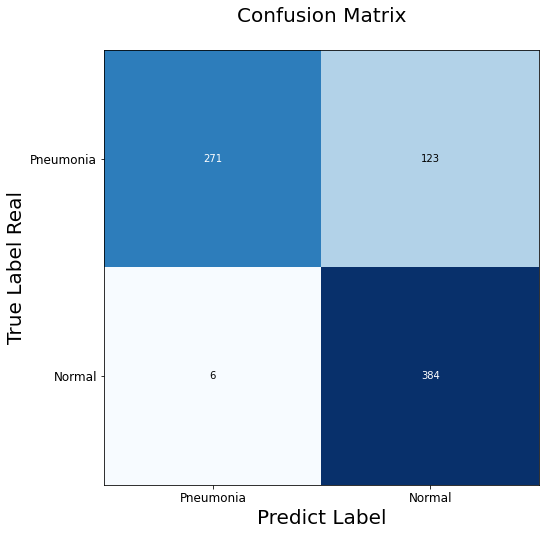

Accuracy: 83.55%
Sensitivity: 68.78%
Specificity: 98.46%



------------------------------------------------------------------------------------------
Report for Model File:  MyDrive/outputmodels/2022-12-22 04-30-23/{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

   Pneumonia       0.98      0.69      0.81       394
      Normal       0.76      0.98      0.86       390

    accuracy                           0.84       784
   macro avg       0.87      0.84      0.83       784
weighted avg       0.87      0.84      0.83       784

------------------------------------------------------------------------------------------


In [ ]:
image_file_name_CM = figure_directory+"/Resnet50"

title = model_file.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label Real',fontsize=20)
plt.xlabel('Predict Label',fontsize=20)
fig.savefig(image_file_name_CM, dpi=100)
fig.savefig(figure_directory+"/CM.pdf", bbox_inches='tight')
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)


total1=sum(sum(CM))

##### From confusion matrix calculate accuracy
print("======================================")
accuracy1=(CM[0,0]+CM[1,1])/total1
print("%s%.2f%s"% ("Accuracy: ", accuracy1*100, "%"))

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print("%s%.2f%s"% ("Sensitivity: ", sensitivity1*100, "%"))

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print("%s%.2f%s"% ("Specificity: ", specificity1*100, "%"))


print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

ROC_AUC

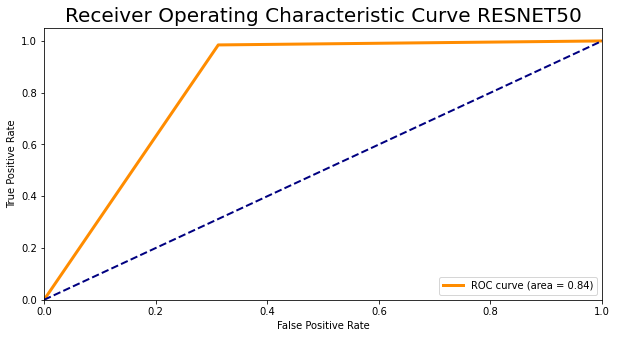

In [ ]:
import sklearn.metrics as metrics

image_file_name_ROC = figure_directory+"/ROC_RESNET50"

fpr, tpr, threshold = roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Creating roc Object to R analysis
rocObj=[y_true, y_pred]
np.savetxt("/content/drive/MyDrive/output/AUC_RESNET50.csv", np.transpose(rocObj), header="y_true,y_pred", delimiter=",",fmt='%f', comments='')

roc_plot = plt.figure(figsize=(10, 5))
0.)
roc_plot.savefig(image_file_name_ROC, dpi=100)
roc_plot.savefig(figure_directory+"/ROC_curve_RESNET50.pdf", bbox_inches='tight')